<a href="https://colab.research.google.com/github/dude123studios/AdvancedDeepLearning/blob/main/Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

In [2]:
np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 30
learning_rate = 1e-3
momentum = 8e-1
hidden_dim = 128
original_dim = 784

In [3]:
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise

noise = np.random.normal(loc=0.5,scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
class Encoder(K.layers.Layer):
  def __init__(self, hidden_dim):
    super(Encoder, self).__init__()
    self.hidden_layer = K.layers.Dense(hidden_dim, activation='relu')
  def call(self, x):
    return self.hidden_layer(x)

In [5]:
class Decoder(K.layers.Layer):
  def __init__(self, original_dim):
    super(Decoder, self).__init__()
    self.output_layer = K.layers.Dense(original_dim, activation='relu')
  def call(self, x):
    return self.output_layer(x)

In [6]:
class Autoencoder(K.Model):
  def __init__(self, hidden_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(hidden_dim)
    self.decoder = Decoder(original_dim)
  def call(self, x):
    bottleneck = self.encoder(x)
    return self.decoder(bottleneck)

In [7]:
model = Autoencoder(hidden_dim, original_dim)
model.compile(loss='mse',optimizer='adam')
loss = model.fit(x_train_noisy, x_train,
                 validation_data=(x_test_noisy, x_test),
                 epochs = max_epochs, batch_size = batch_size)

Epoch 1/30
235/235 [==============================] - 3s 4ms/step - loss: 0.0681 - val_loss: 0.0335
Epoch 2/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0318 - val_loss: 0.0275
Epoch 3/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0274 - val_loss: 0.0259
Epoch 4/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0260 - val_loss: 0.0254
Epoch 5/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0254 - val_loss: 0.0248
Epoch 6/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0252 - val_loss: 0.0248
Epoch 7/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0251 - val_loss: 0.0247
Epoch 8/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0248 - val_loss: 0.0242
Epoch 9/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0245 - val_loss: 0.0243
Epoch 10/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0245 - val_loss: 0.0242

Text(0, 0.5, 'loss')

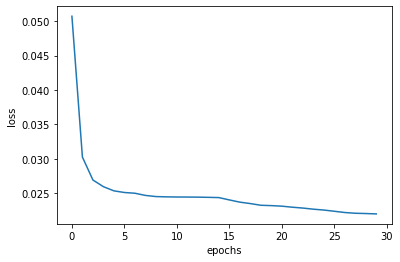

In [8]:
plt.plot(range(max_epochs), loss.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

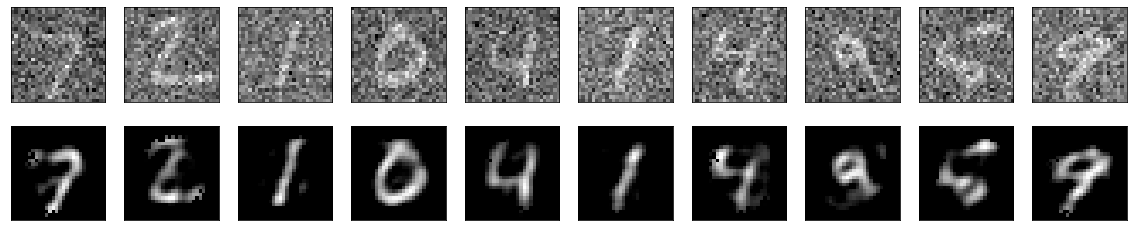

In [10]:
number = 10
plt.figure(figsize=(20,4))
for index in range(number):
  ax = plt.subplot(2, number, index+1)
  plt.imshow(x_test_noisy[index].reshape(28,28),cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, number, index+ 1 + number)
  plt.imshow(model(x_test_noisy)[index].numpy().reshape(28,28),cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()